In [1]:
#Importing necessary libraries and modules
import tensorflow as tf
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import cv2
from pylab import rcParams
rcParams['figure.figsize'] = 12, 10
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [2]:
# Path array of infected and uninfected cell images
infected_cells = glob.glob("C:/SABBIR/Programming2019/DeepLearning/cell_images/cell_images/Parasitized/*.png")
uninfected_cells = glob.glob("C:/SABBIR/Programming2019/DeepLearning/cell_images/cell_images/Uninfected/*.png")

In [3]:
print(len(infected_cells))
print(len(uninfected_cells))
print(('Total images in the dataset is: ', len(infected_cells) + len(uninfected_cells)))

13779
13779
('Total images in the dataset is: ', 27558)


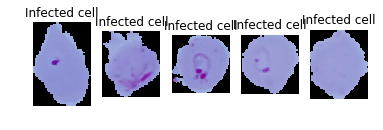

In [4]:
#Plotting raw infected cell images

plt.figure()
for i in range(1,6):
    plt.subplot(1,5,i)
    ran=np.random.randint(100)
    plt.imshow(cv2.imread(infected_cells[ran]))
    plt.axis("off")
    plt.title('Infected cell')

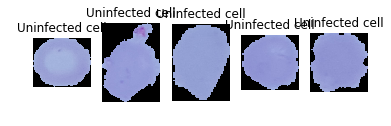

In [5]:
#Plotting raw uninfected cell images

plt.figure()
for i in range(1,6):
    plt.subplot(1,5,i)
    ran=np.random.randint(100)
    plt.imshow(cv2.imread(uninfected_cells[ran]))
    plt.axis("off")
    plt.title('Uninfected cell')

Now, we have all image names in "infected" and "uninfected" lists. But images don't have same pixel rates. We need to resize all pictures and my chosen size is 50x50 for this implementation.

In [6]:
infected_images = [] # All the infected image cells will be appended in this lis
for i_images in infected_cells:
    img = cv2.imread(i_images)
    res_img = cv2.resize(img,(50,50)) # resizing to 50*50 pixels
    infected_images.append(res_img)

uninfected_images = [] # All the uninfected image cells will be appended in this list
for u_images in uninfected_cells:
    img = cv2.imread(u_images)
    res_img = cv2.resize(img,(50,50))# resizing to 50*50 pixels
    uninfected_images.append(res_img)

Let's visualize some resized cells

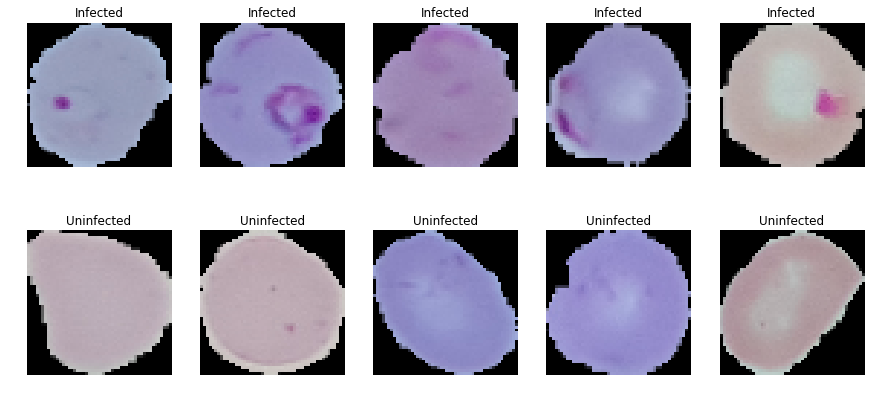

In [7]:
rand = np.random.randint(len(infected_images)-1,size = 10)
plt.figure(1, figsize=(15,7))
for i in range(1,11):
        plt.subplot(2,5,i)
        if i < 6:
            plt.imshow(infected_images[rand[i-1]])
            plt.axis("off")
            plt.title("Infected")
        else:
            plt.imshow(uninfected_images[rand[i-1]])
            plt.axis("off")
            plt.title("Uninfected")

From the above images, we can clearly distinguish that the cells with red(or pink) color blobs are being categorized as infected cells.

Creating Feature and Response matrices for the data set

In [8]:
images = [] # All images (Inputs)
label = []  # Response matrix
for i in infected_images:
    images.append(i) # Appending all infected cell images
    label.append(1) # It will append 1 into the label list for all infected images
    
for j in uninfected_images:
    images.append(j) # Appending all infected cell images
    label.append(0) # It will append 1 into the label list for all infected images

print(len(images))
print(len(label))

27558
27558


In [9]:
# List to Array Conversions and resclaing
images = np.array(images)
labels = np.array(label)

np.save('Cells' , images)
np.save('Labels' , labels)

n = np.arange(images.shape[0])
np.random.shuffle(n)
images = images[n]
labels = labels[n]
cells = images.astype(np.float32)
labels = labels.astype(np.int32)
cells = cells/255
cells.shape

(27558, 50, 50, 3)

We need to shuffle the data as all 1s' and 0s' have been appended together.
Also, converting X into float32 and y into int32 as well as normalize the pixel values.

In [10]:
#Shuffling
'''X, y = shuffle(X, y, random_state=0) 

#Ensuring data type
X = X.astype(np.float32)
y = y.astype(np.int32)

#Normalizing pixels
X = X/255'''


'X, y = shuffle(X, y, random_state=0) \n\n#Ensuring data type\nX = X.astype(np.float32)\ny = y.astype(np.int32)\n\n#Normalizing pixels\nX = X/255'

Time to split the data into training and testing sets

(22046, 50, 50, 3)
(2756, 50, 50, 3)
(22046,)
(2756,)


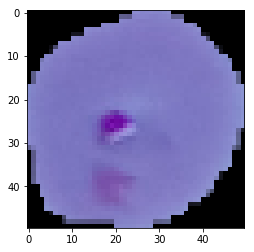

In [11]:
# Train-Test splitting
 
X_train, x, y_train, y = train_test_split(cells , labels, test_size = 0.2, random_state = 42)

eval_X , X_test , eval_y , y_test = train_test_split(x , y , 
                                                    test_size = 0.5 , 
                                                    random_state = 42)

#y_train  = y_train.astype(int)
#y_test  = y_test.astype(int)
#batch_size =len(X_train)


''''from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Train
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
# Test
X_test_scaled = scaler.fit_transform(X_test.astype(np.float64))
feature_columns = [tf.feature_column.numeric_column('x', shape=X_train_scaled.shape[1:])]
X_train_scaled.shape[1:]'''

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
plt.imshow(X_train[1])

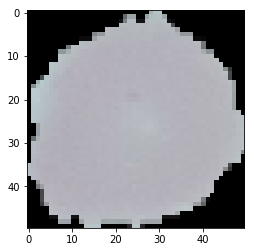

In [12]:
plt.imshow(X_train[1000])

In [13]:
def cnn_model_fn(features , labels , mode):
    #Input Layer
    input_layer = tf.reshape(features["x"] , [-1 , 50 , 50 ,3])
 #We set the batch size to -1 in the shape argument so that it takes the shape of the features["X"]

    #First convolutional layer
    conv1 = tf.layers.conv2d(
        inputs = input_layer , 
        filters = 50 , 
        kernel_size = [7 , 7],
        padding = 'same',
        activation = tf.nn.relu
        ) 
    
    # first Pooling Layer 
    pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], strides=2)
    
    # Second Convolutional layer
    conv2 = tf.layers.conv2d(
        inputs = pool1, 
        filters = 90,
        kernel_size = [3 , 3],
        padding = 'valid',
        activation = tf.nn.relu
        )
    
    # 2nd Pooling Layer 
    pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], strides=2)

    #3rd Convolutional layer    
    conv3 = tf.layers.conv2d(
        inputs = pool2 ,
        filters = 10,
        kernel_size = [5 , 5],
        padding = 'same', 
        activation = tf.nn.relu
        )
    
    # 3rd Pooling Layer 
    pool3 = tf.layers.max_pooling2d(inputs=conv3, pool_size=[2, 2], strides=2)
    
    #4th Convolutional layer    
    conv4 = tf.layers.conv2d(
        inputs = pool3 ,
        filters = 5,
        kernel_size = [3 , 3],
        padding = 'same', 
        activation = tf.nn.relu
        )
    
    # 4th Pooling Layer 
    pool4 = tf.layers.max_pooling2d(inputs=conv4, pool_size=[2, 2], strides=2, padding = 'same')
    
# Now have to define fully connected layers. Before that, the feature map has to be flatten
 
    pool4_to_flat = tf.layers.flatten(pool4)
    
    #Fully connected layers
    dense1 = tf.layers.dense(
        inputs = pool4_to_flat,
        units = 2000,
        activation = tf.nn.relu
        )
    dense2 = tf.layers.dense(
        inputs = dense1,
        units = 1000,
        activation = tf.nn.relu
        )
    dense3 = tf.layers.dense(
        inputs = dense2 , 
        units = 500 ,
        activation = tf.nn.relu
        )
    
    #Dropout (Shooting) rate to control overfitting during the training phase only
    #0.25 means 25% weights will be set to zero
    dropRate = tf.layers.dropout(
      inputs=dense3, rate=0.3, training=mode == tf.estimator.ModeKeys.TRAIN)
    
    # Logits Layer, the last layer with the prediction of the model
    logits = tf.layers.dense(inputs=dropRate, units = 2)

    # Creating dictionary(Key-value pairs) containing the classes and the probability of each class
    predictions = {
        'classes': tf.argmax(input = logits , axis = 1),
        'probabilities': tf.nn.softmax(logits , name = 'softmax_tensor')
    }
    
    #Returning dictionary predictions when the mode is set to prediction
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode = mode , 
                                          predictions = predictions)
    # Calculating loss
    loss = tf.losses.sparse_softmax_cross_entropy(labels = labels , logits = logits)
   
    
    # Configure the Training Op (for TRAIN mode)
    # the learning rate is: # 0.0001 + 0.003 * (1/e)^(step/1000)), i.e. exponential decay from 0.003->0.0001
    #lr = 0.0001 +  tf.train.exponential_decay(0.003, 10, 1000, 1/math.e)
    #train_step = tf.train.AdamOptimizer(lr).minimize(cross_entropy)
    if mode == tf.estimator.ModeKeys.TRAIN:
        optimizer = tf.train.AdamOptimizer(learning_rate=0.0001)
        #optimizer = tf.train.AdamOptimizer(lr).minimize(cross_entropy)
        train_op = optimizer.minimize(loss=loss, global_step = tf.train.get_global_step())
        return tf.estimator.EstimatorSpec(mode=mode, loss = loss, train_op = train_op)
    
    # Adding evaluation metrics to display the performance metrics during the evaluation mode.
    eval_metric_op = {
      "accuracy": tf.metrics.accuracy(
          labels=labels, predictions=predictions["classes"])}
    return tf.estimator.EstimatorSpec(
      mode = mode, loss = loss, eval_metric_ops = eval_metric_op)

In [17]:
#Creating the estimator
malaria_cell_detector = tf.estimator.Estimator(model_fn = cnn_model_fn , 
                                         model_dir = None)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Sabbir\\AppData\\Local\\Temp\\tmpjbqn3oad', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002631E47FCF8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


A CNN takes many times to train, therefore, I am creating a Logging hook to store the values of the softmax layers for every 50 iterations.

In [18]:
# Set up logging for predictions
tensors_to_log = {"probabilities": "softmax_tensor"}
logging_hook = tf.train.LoggingTensorHook(tensors=tensors_to_log, every_n_iter=50)

In [20]:
# Train the model
train_input_fn = tf.estimator.inputs.numpy_input_fn(
    x = {"x": X_train},
    y = y_train,
    batch_size = 1000,
    num_epochs = None,
    shuffle = True)
malaria_cell_detector.train(input_fn =train_input_fn, steps = 1, hooks = [logging_hook])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Sabbir\AppData\Local\Temp\tmpjbqn3oad\model.ckpt-1
Instructions for updating:
Use standard file utilities to get mtimes.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\Sabbir\AppData\Local\Temp\tmpjbqn3oad\model.ckpt.
INFO:tensorflow:probabilities = [[0.5091793  0.49082068]
 [0.5092173  0.49078262]
 [0.5083379  0.491662  ]
 ...
 [0.5098679  0.49013212]
 [0.5077081  0.4922919 ]
 [0.50784737 0.49215254]]
INFO:tensorflow:loss = 0.6936077, step = 2
INFO:tensorflow:Saving checkpoints for 2 into C:\Users\Sabbir\AppData\Local\Temp\tmpjbqn3oad\model.ckpt.
INFO:tensorflow:Loss for final step: 0.6936077.


So the model is trained. 
And, now time to evaluate the model and see the results of the model

In [ ]:
# Evaluate the model and printing results
eval_input_fn = tf.estimator.inputs.numpy_input_fn(
    x = {"x": X_test},
    y = y_test,
    num_epochs=1,
    shuffle=False)
eval_results = malaria_cell_detector.evaluate(input_fn=eval_input_fn)
print(eval_results)